In [ ]:
import numpy as np # Used for numerical operations — especially working with arrays, vectors, and matrices.
import pandas as pd # Used for data manipulation and analysis, mainly with tabular data (rows & columns like Excel).
import matplotlib.pyplot as plt # Used for visualizing data — making plots, charts, and graphs.

In [35]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv') # (You are loading CSV data into a DataFrame.)

In [36]:
data.head() # show first data set

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## Data Preprocessing

In [37]:
data.shape #row 7920 clomn 3

(7920, 3)

In [38]:
data.duplicated() # duplicated data thiyanwada balanwa 

0       False
1       False
2       False
3       False
4       False
        ...  
7915    False
7916    False
7917    False
7918    False
7919    False
Length: 7920, dtype: bool

In [33]:
data.duplicated().sum() # duplicated data thiyanwada balanwa udin apu eke sum gannawa 

np.int64(1)

In [ ]:
data.isnull().sum() # null value cheking

id       0
label    0
tweet    0
dtype: int64

#Text Preprocessing Chaking doc file


In [40]:
import re
import string

conevrt Lowercase to Upcases

In [ ]:
data["tweet"].head(5) #data set 5k viewe

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

In [42]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split())) #lemda funtion

In [ ]:
data["tweet"].head(5)   ##Pregnancy--->#pregnancy

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

Removeing links

In [44]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [ ]:
data["tweet"].head(5) #https://goo...  meweni fromat thioth  refash kranwa

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

Remove punctuations

In [47]:
string.punctuation  #not lamda funtion call for other funtion

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [51]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

removing anumbers

In [52]:
data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True) #7917 ....ovely 90 year ......

remove stopwords

In [55]:
!pip install nltk 

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.5 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 4.7 MB/s eta 0:00:00

   ---------------------------------------- 0/4 [regex]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   ---------- ----------------------------- 1/4 [joblib]
   -------------------- --

In [56]:
import nltk #wenama libery ekka use karanwa me wedeta

In [57]:
nltk.download('stopwords', download_dir='../static/model') #file tika downlod karan ewa use karala removing our data set

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [60]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines() #ape data set eke stopwords ganna vidiya

In [61]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [62]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [63]:
data["tweet"].head(5)

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

Stemming  is gose went ---> change go 

In [64]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [65]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [ ]:
data["tweet"].head()  #wired --->wire 

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [67]:
data #data tika balamu

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


### Vocabulary Building

In [73]:
from collections import Counter
vocab = Counter()  #unit work kiyada ewa ki polaka repet wela thiyeda balanwa

In [74]:
vocab

Counter()

In [75]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [80]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [76]:
len(vocab)

15949

In [77]:
data.shape

(7920, 3)

In [78]:
tokens = [key for key in vocab if vocab[key] > 10]

In [79]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

## Handle Overfitting Problem

In [ ]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt') #methana wenne ape vocabury tika eka tokens dagannawa eka loction save karanwa

Divide dataset

In [98]:
X = data['tweet']
y = data['label']

In [84]:

!pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 1.0 MB/s eta 0:00:11
   --- ------------------------------------ 1.0/11.1 MB 1.6 MB/s eta 0:00:07
   ----- ---------------------------------- 1.6/11.1 MB 1.9 MB/s eta 0:00:06
   -------- ------------------------------- 2.4/11.1 MB 2.2 MB/s eta 0:00:04
   ----------- ---------------------------- 3.1/11.1 MB 2.4 MB/s eta 0:00:04
   -------------- ------------------------- 3.9/11.1 MB 2.6 MB/s eta 0:00:03
   ---------------- ----------------------- 4.7/11.1 MB 2.8 MB/s eta 0:00:03
   -------------------- ------------------- 5.8/11.1 MB 3.0 MB/s eta 0:00:02
   ------------------------ ------

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 20% test kranna yawanwa ithriya tran wenwa

In [ ]:
X_train #tran karanna giya data tika

5661    good morn time motorola moto androidwear charg...
7716    repent rhyme ing bing sing ring ping king toda...
4290    cant find nowher tagsforlik tfler tweegram pho...
2454    best friend best friend cilacap miss samsung b...
1656    asleep train photographi photooftheday iphon m...
                              ...                        
281     take look samsung cool see dream initi samsung...
1614    repost lexzaroni via crowdfir sunris london ex...
1245    goodnight selfi boy ink bed latergram cute fac...
5928    new panda babi bear cute iphonex case design b...
2355    imovi wont open sinc updat still video edit as...
Name: tweet, Length: 6336, dtype: object

In [ ]:
X_test #test kranna giya value tika

1746    charger cabl ebay amazon … etsi makeasongsingl...
4663    android user feel appl rule world appl applete...
5473                       get text hour sent iphon suchb
7213    im press speed iphon definit feel product incr...
7587    yehey thank po tito father best gift ever gift...
                              ...                        
3234    sethflut gentlemenhal sailintothesun didyoukno...
3373    light show haywardgalleri kknandra art london ...
6153    mishap new day old iphon part screen went dead...
4027    hey guy look appleiphonexgbsilverunlock money ...
7676    love iphon thumb print sign good phone iphon a...
Name: tweet, Length: 1584, dtype: object

In [ ]:
y_train #x_train  abele colomn

5661    0
7716    0
4290    0
2454    0
1656    0
       ..
281     0
1614    0
1245    0
5928    0
2355    1
Name: label, Length: 6336, dtype: int64

Vectorization

In [89]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [90]:
vectorized_x_train = vectorizer(X_train, tokens)

In [91]:
vectorized_x_test = vectorizer(X_test, tokens)

In [92]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6336, 1145), dtype=float32)

In [93]:

y_train

5661    0
7716    0
4290    0
2454    0
1656    0
       ..
281     0
1614    0
1245    0
5928    0
2355    1
Name: label, Length: 6336, dtype: int64

In [94]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1145), dtype=float32)

In [95]:

y_test

1746    0
4663    0
5473    1
7213    0
7587    0
       ..
3234    0
3373    0
6153    0
4027    0
7676    0
Name: label, Length: 1584, dtype: int64

In [96]:
y_train.value_counts()

label
0    4717
1    1619
Name: count, dtype: int64

methana data set aka inbalnce data set ekka ai kiwawoth negative data wedi eka samane model eka positive peththata bara wenawa

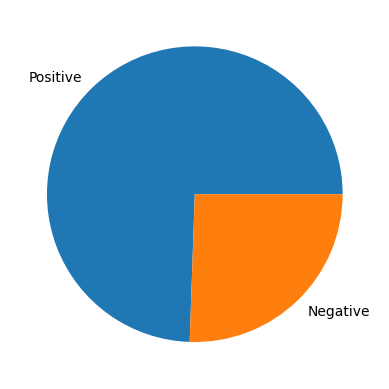

In [ ]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show() #pot karala balanwa idea akka ganna

## Handle imbalanced dataset

tcehnic ekka

In [100]:
!pip install imbalanced-learn


   ---------------------------------------- 0/2 [sklearn-compat]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-lea

In [101]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9444, 1145) (9444,)


In [ ]:
y_train_smote.value_counts() # balnce wela

label
0    4722
1    4722
Name: count, dtype: int64

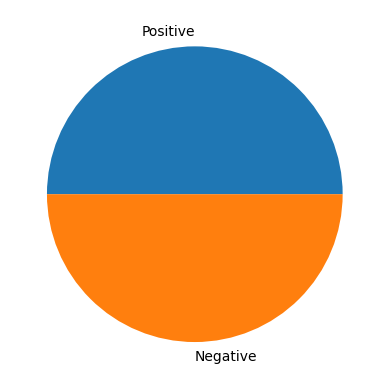

In [103]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [104]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(9444, 1145), dtype=float32)

In [105]:
y_train_smote

0       0
1       0
2       0
3       0
4       0
       ..
9439    1
9440    1
9441    1
9442    1
9443    1
Name: label, Length: 9444, dtype: int64

In [106]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1145), dtype=float32)

In [107]:
y_test

3969    0
3438    0
2391    0
3596    0
4839    0
       ..
3218    0
2589    1
992     0
4788    0
810     0
Name: label, Length: 1584, dtype: int64

## Model Training and Evaluation

https://www.youtube.com/watch?v=mDd1uEqDrK0

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [111]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

## Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote) 

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test) 

training_scores(y_train_smote, y_train_pred) #training_scores

validation_scores(y_test, y_test_pred) #Accuracy  alala

Training Scores:
	Accuracy = 0.739
	Precision = 0.725
	Recall = 0.77
	F1-Score = 0.747
Testing Scores:
	Accuracy = 0.547
	Precision = 0.246
	Recall = 0.359
	F1-Score = 0.292


## Naive Bayes

In [113]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.709
	Precision = 0.69
	Recall = 0.76
	F1-Score = 0.724
Testing Scores:
	Accuracy = 0.549
	Precision = 0.268
	Recall = 0.425
	F1-Score = 0.329


## Decision Tree

In [114]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.975
	Precision = 0.981
	Recall = 0.968
	F1-Score = 0.975
Testing Scores:
	Accuracy = 0.612
	Precision = 0.227
	Recall = 0.204
	F1-Score = 0.215


## Random Forest

In [115]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.975
	Precision = 0.979
	Recall = 0.97
	F1-Score = 0.975
Testing Scores:
	Accuracy = 0.689
	Precision = 0.192
	Recall = 0.061
	F1-Score = 0.092


## Support Vector Machine

In [116]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.919
	Precision = 0.93
	Recall = 0.906
	F1-Score = 0.918
Testing Scores:
	Accuracy = 0.651
	Precision = 0.226
	Recall = 0.141
	F1-Score = 0.173


In [ ]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:  #model save kara gannawa pickle librry eka hrah 
    pickle.dump(lr, file) # Logistic Regression model save karanne